In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Universal bank data

bankdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\KNN\Universalbank.csv", header=0) 
bankdata_bk = bankdata.copy()
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Display the dataset information

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 10 : 1, then the dataset is imbalance data)

CreditCard_count = bankdata.CreditCard.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Bank records:', len(bankdata))

Class 0: 3530
Class 1: 1470
Proportion: 2.4 : 1
Total Bank records: 5000


In [5]:
# Displaying Duplicate values with in Loan ataset, if avialble

bankdata_dup = bankdata[bankdata.duplicated(keep='last')]
bankdata_dup

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [6]:
# Count the missing values by each variable, if available

bankdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']

In [8]:
# Display the columns

bankdata.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [9]:
# cols1  variables - creating a dummy variables

cols1 = ['Family', 'Education']
print(cols1)

['Family', 'Education']


In [10]:
# cols2 variables - MinMaxScalar function

cols2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
print(cols2)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


In [11]:
# Create dummy variable for all range values

bankdata = pd.get_dummies(bankdata, columns=cols1)
bankdata.head().T

,0,1,2,3,4
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0


In [12]:
# Identify the dependent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [13]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

In [14]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Conver x_train values

x_train[cols2] = sc.fit_transform(x_train[cols2])


# Conver x_test values

x_test[cols2] = sc.fit_transform(x_test[cols2])

# Convert to dataframes

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [15]:
# Load the result dataset for KNN

knn_results = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\KNN\knnresults.csv", header=0)
knn_results.head()

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[143 284]
 [321 752]]
Outcome values : 
 143 284 321 752
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.33      0.32       427
           0       0.73      0.70      0.71      1073

    accuracy                           0.60      1500
   macro avg       0.52      0.52      0.52      1500
weighted avg       0.61      0.60      0.60      1500

Accuracy : 59.7 %
Precision : 30.8 %
Recall : 33.5 %
F1 Score : 0.321
Specificity or True Negative Rate : 70.1 %
Balanced Accuracy : 51.8 %
MCC : 0.035
roc_auc_score: 0.518


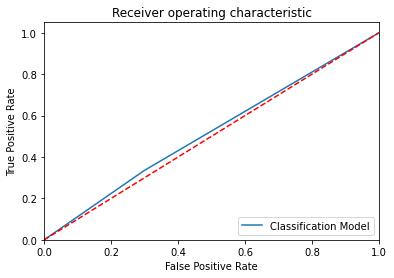

-----------------------------------------------------------------------------------------------------
KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 42 385]
 [103 970]]
Outcome values : 
 42 385 103 970
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.10      0.15       427
           0       0.72      0.90      0.80      1073

    accuracy                           0.67      1500
   macro avg       0.50      0.50      0.47      1500
weighted avg       0.59      0.67      0.61      1500

Accuracy : 67.5 %
Precision : 29.0 %
Recall : 9.8 %
F1 Score : 0.147
Specificity or True Negative Rate : 90.4 %
Balanced Accuracy : 50.1 %
MCC : 0.004
roc_auc_score: 0.501


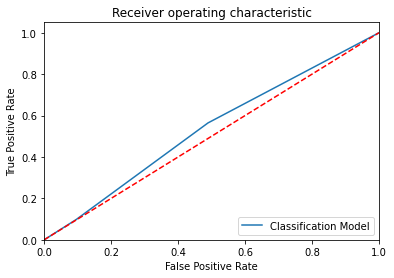

-----------------------------------------------------------------------------------------------------
KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[108 319]
 [212 861]]
Outcome values : 
 108 319 212 861
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.25      0.29       427
           0       0.73      0.80      0.76      1073

    accuracy                           0.65      1500
   macro avg       0.53      0.53      0.53      1500
weighted avg       0.62      0.65      0.63      1500

Accuracy : 64.6 %
Precision : 33.8 %
Recall : 25.3 %
F1 Score : 0.289
Specificity or True Negative Rate : 80.2 %
Balanced Accuracy : 52.8 %
MCC : 0.061
roc_auc_score: 0.528


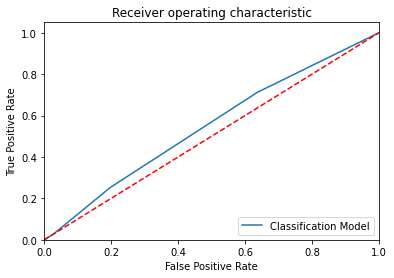

-----------------------------------------------------------------------------------------------------
KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 41 386]
 [ 89 984]]
Outcome values : 
 41 386 89 984
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.10      0.15       427
           0       0.72      0.92      0.81      1073

    accuracy                           0.68      1500
   macro avg       0.52      0.51      0.48      1500
weighted avg       0.60      0.68      0.62      1500

Accuracy : 68.3 %
Precision : 31.5 %
Recall : 9.6 %
F1 Score : 0.147
Specificity or True Negative Rate : 91.7 %
Balanced Accuracy : 50.7 %
MCC : 0.021
roc_auc_score: 0.507


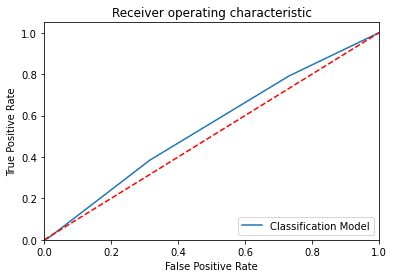

-----------------------------------------------------------------------------------------------------
KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 81 346]
 [166 907]]
Outcome values : 
 81 346 166 907
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.19      0.24       427
           0       0.72      0.85      0.78      1073

    accuracy                           0.66      1500
   macro avg       0.53      0.52      0.51      1500
weighted avg       0.61      0.66      0.63      1500

Accuracy : 65.9 %
Precision : 32.8 %
Recall : 19.0 %
F1 Score : 0.24
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 51.8 %
MCC : 0.043
roc_auc_score: 0.517


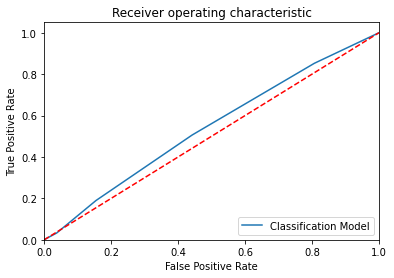

-----------------------------------------------------------------------------------------------------
KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  27  400]
 [  69 1004]]
Outcome values : 
 27 400 69 1004
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.06      0.10       427
           0       0.72      0.94      0.81      1073

    accuracy                           0.69      1500
   macro avg       0.50      0.50      0.46      1500
weighted avg       0.59      0.69      0.61      1500

Accuracy : 68.7 %
Precision : 28.1 %
Recall : 6.3 %
F1 Score : 0.103
Specificity or True Negative Rate : 93.6 %
Balanced Accuracy : 50.0 %
MCC : -0.002
roc_auc_score: 0.499


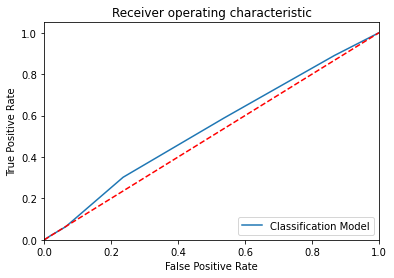

-----------------------------------------------------------------------------------------------------
KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 54 373]
 [120 953]]
Outcome values : 
 54 373 120 953
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.13      0.18       427
           0       0.72      0.89      0.79      1073

    accuracy                           0.67      1500
   macro avg       0.51      0.51      0.49      1500
weighted avg       0.60      0.67      0.62      1500

Accuracy : 67.1 %
Precision : 31.0 %
Recall : 12.6 %
F1 Score : 0.18
Specificity or True Negative Rate : 88.8 %
Balanced Accuracy : 50.7 %
MCC : 0.021
roc_auc_score: 0.507


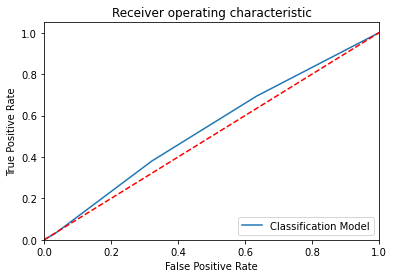

-----------------------------------------------------------------------------------------------------
KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  26  401]
 [  60 1013]]
Outcome values : 
 26 401 60 1013
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.06      0.10       427
           0       0.72      0.94      0.81      1073

    accuracy                           0.69      1500
   macro avg       0.51      0.50      0.46      1500
weighted avg       0.60      0.69      0.61      1500

Accuracy : 69.3 %
Precision : 30.2 %
Recall : 6.1 %
F1 Score : 0.101
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 50.2 %
MCC : 0.01
roc_auc_score: 0.502


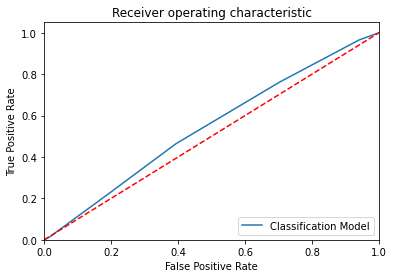

-----------------------------------------------------------------------------------------------------
KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 44 383]
 [105 968]]
Outcome values : 
 44 383 105 968
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.10      0.15       427
           0       0.72      0.90      0.80      1073

    accuracy                           0.67      1500
   macro avg       0.51      0.50      0.48      1500
weighted avg       0.60      0.67      0.61      1500

Accuracy : 67.5 %
Precision : 29.5 %
Recall : 10.3 %
F1 Score : 0.153
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 50.3 %
MCC : 0.008
roc_auc_score: 0.503


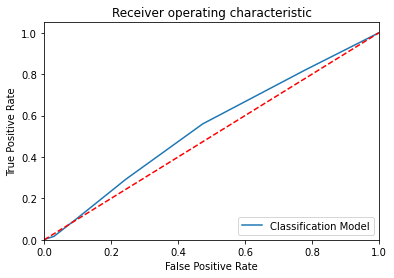

-----------------------------------------------------------------------------------------------------


In [16]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 10, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #--------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    knn_results = knn_results.append(new_row, ignore_index=True)
    #--------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [18]:
# Write the file

knn_results.to_csv("C:/Users/Admin/Downloads/Raju Sir DLS/KNN/InsuranceResultsNew.csv")

# Display the results

knn_results.head(10)

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,0.597,0.308,0.335,0.321,0.701,0.035,0.517867,0.518
1,KNeighborsClassifier(n_neighbors=2),2,0.675,0.29,0.098,0.147,0.904,0.004,0.501184,0.501
2,KNeighborsClassifier(n_neighbors=3),3,0.646,0.338,0.253,0.289,0.802,0.061,0.527675,0.528
3,KNeighborsClassifier(n_neighbors=4),4,0.683,0.315,0.096,0.147,0.917,0.021,0.506537,0.507
4,KNeighborsClassifier(),5,0.659,0.328,0.19,0.24,0.845,0.043,0.517495,0.518
5,KNeighborsClassifier(n_neighbors=6),6,0.687,0.281,0.063,0.103,0.936,-0.002,0.499463,0.5
6,KNeighborsClassifier(n_neighbors=7),7,0.671,0.31,0.126,0.18,0.888,0.021,0.507314,0.507
7,KNeighborsClassifier(n_neighbors=8),8,0.693,0.302,0.061,0.101,0.944,0.01,0.502486,0.502
8,KNeighborsClassifier(n_neighbors=9),9,0.675,0.295,0.103,0.153,0.902,0.008,0.502594,0.503
